In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

##Problematique 
Quel est l'élément déclencheur qui nous fait penser *hey, j'aime cette personne* ? 
tri sur la coolone dec_o puis analyser en fonction de la personnalité par exemple (drole..)
Comment nous voyons-nous pour susciter l'intérêt des personnes du sexe opposé ?
(How do you think you measure up?)

Donc on va utiliser les données de speed dating pour explorer différentes façons de répondre à ces questions. 
Pour répondre a cette problématique on passera par les étapes suivantes :
* L'âge, le sexe, la race, le domaine d'études, etc. seront explorés ici, et nous découvrirons des différences inattendues dans divers segments de cet échantillon de personnes.


In [186]:
df_data = pd.read_csv('Speed Dating Data.csv', encoding='ISO-8859-1')
df_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [187]:
df_data.shape

(8378, 195)

In [188]:
df_data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [189]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

DataFrame avec uniquement les entrées uniques, ce qui nous donne le nombre réel de participants : 551.

In [190]:
df = df_data[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


On a l'ensemble de données en termes de caractéristiques qui décrivent les participants. L'objectif est d'apprendre à connaître le contenu de cet ensemble de données et d'obtenir des indications sur les éléments à privilégier pour une analyse plus approfondie.

Ces événements étaient destinés à des partenaires de genre opposé. Enparticulier

In [191]:
df['gender'] = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)
df_data['gender'] = df_data.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_data.gender)
df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

On remarque qu'on a plus d'hommes que de femmes. Voyons si nous pouvons voir des différences selon l'âge.

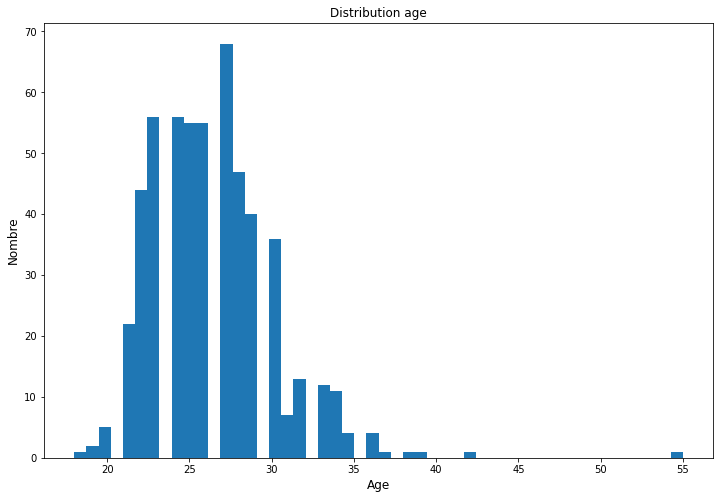

In [192]:
ax = df.age.hist(bins=50, figsize=(12,8))
ax.set_title('Distribution age', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Nombre', fontsize=12)
ax.grid(False)

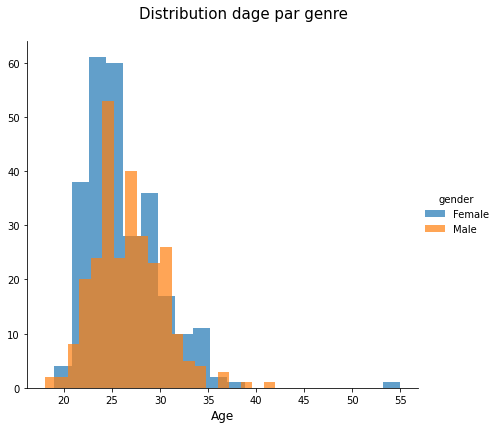

In [193]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution d''age par genre', fontsize=15)
g.add_legend()

In [194]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

*La différence peut être due à la présence de *Na* dans caractéristique d'âge.


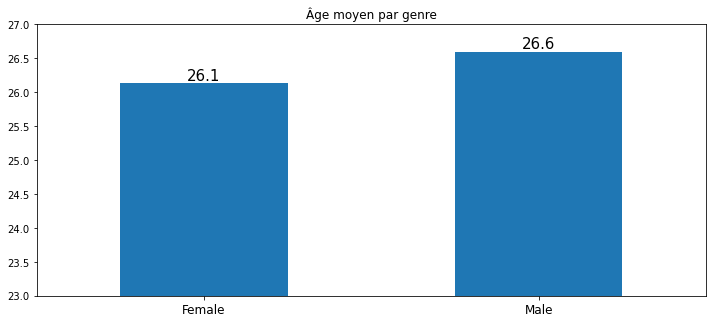

In [195]:
ax = df[['gender', 'age']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False, 
                                               title='Âge moyen par genre',
                                                   ylim=(23,27))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')

ax.set_xlabel('', fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

On peut constater que les hommes participant à ces événements sont légèrement plus âgés que les femmes.

Ensuite, nous allons nous interesser sur la race des participants.

In [196]:
df['race'] = df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df.race)
df_data['race'] = df_data.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_data.race)
df_data['race_o'] = df_data.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(df_data.race_o)
df.race.value_counts(dropna=False)

White       304
Asian       136
Hispanic     42
Other        37
Black        26
NaN           6
Name: race, dtype: int64

La plupart des participants sont caucasiens, puis asiatiques. cela peut etre du a leurs culture par exemple

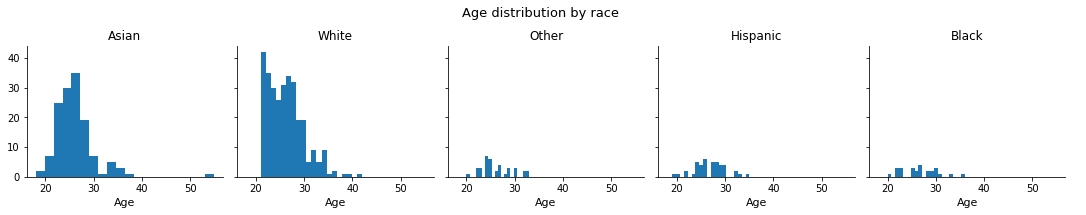

In [197]:
g = sns.FacetGrid(df, col='race', height=3)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [198]:
df[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
               mean median   min   max count
race                                        
Asian     26.198529   26.0  18.0  55.0   136
Black     26.692308   27.0  20.0  36.0    26
Hispanic  26.785714   27.0  19.0  35.0    42
Other     26.162162   25.0  20.0  33.0    37
White     26.367550   26.0  21.0  42.0   302

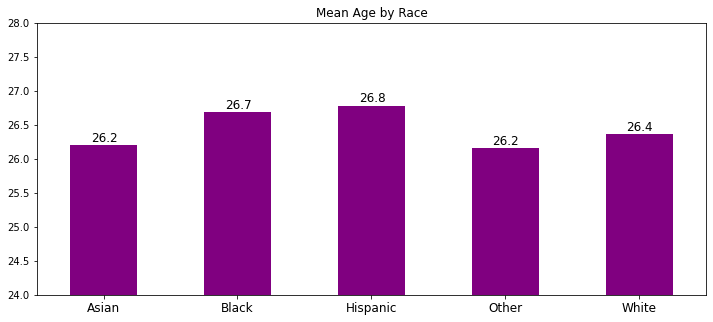

In [199]:
ax = df[['race', 'age']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Mean Age by Race',ylim=(24,28), color='purple')
ax.set_xticklabels(['Asian', 'Black', 'Hispanic',  'Other', 'White'], 
                   fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.155, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Les participants asiatiques sont plus jeunes, tandis que les participants noirs et hispaniques sont plus âgés en moyenne.

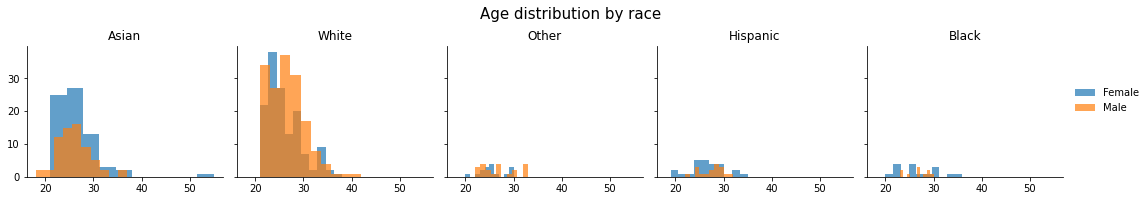

In [200]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=15)

g._legend.set_title('')

In [201]:
df[['race','gender', 'age']].groupby(['race', 'gender'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

age                         
                      mean median   min   max count
race     gender                                    
Asian    Female  26.380282   26.0  21.0  55.0    71
         Male    26.000000   26.0  18.0  37.0    65
Black    Female  26.625000   26.0  20.0  36.0    16
         Male    26.800000   27.0  23.0  30.0    10
Hispanic Female  26.600000   26.0  19.0  35.0    25
         Male    27.058824   28.0  22.0  32.0    17
Other    Female  25.125000   25.0  20.0  30.0    16
         Male    26.952381   27.0  22.0  33.0    21
White    Female  25.971631   25.0  21.0  38.0   141
         Male    26.714286   27.0  21.0  42.0   161

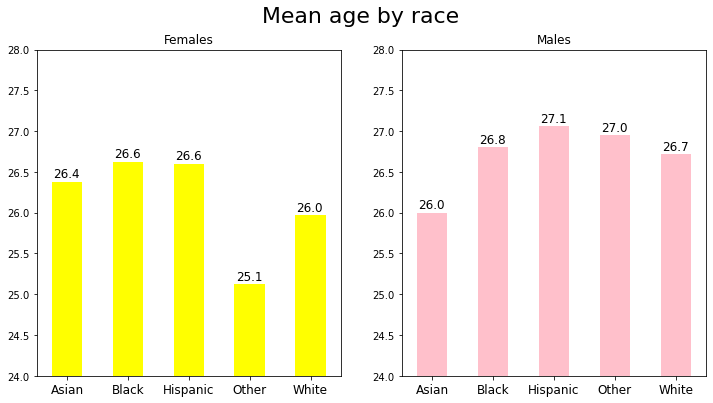

In [202]:
fig, ax= plt.subplots(1,2, figsize=(12, 6))

df[df.gender=='Female'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(24,28),
                                                              color='yellow')

df[df.gender=='Male'][['race', 'age']].groupby('race').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(24,28),
                                                              color='pink')

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean age by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.02, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Pour les Caucasiens (et la race "Autre"), les hommes sont plus nombreux que les femmes, alors que nous avons la tendance inverse pour toutes les autres races. De plus, pour ces 2 races, nous pouvons observer que les hommes ont tendance à être beaucoup plus âgés en moyenne. Les femmes asiatiques sont plus âgées que leurs homologues masculins.

Nous pouvons maintenant examiner ce que les participants étudient.


In [203]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df.field_cd)
df_data['field_cd'] = df_data.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df_data.field_cd)
df.field_cd.value_counts(dropna=False)

Econ        130
Nat. Sc.     61
Eng.         56
Law          48
Pol. Sc.     46
Soc. Sc.     46
Educ.        40
Soc. Wr.     30
Journ.       21
Hist.        17
Math         14
Arts         11
Med. Sc.      9
NaN           7
Film          7
Oth.          3
Lang.         3
Arch.         1
Und.          1
Name: field_cd, dtype: int64

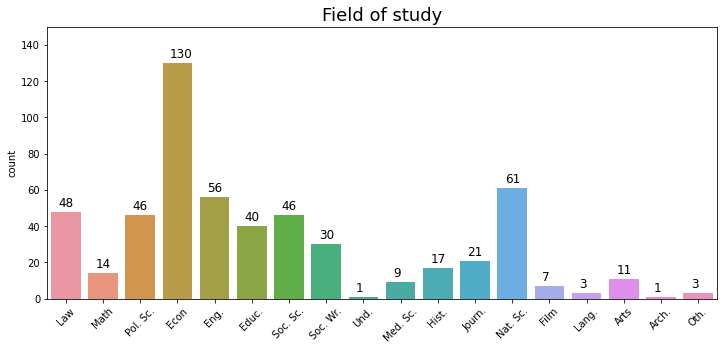

In [204]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=df)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 150)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

Une grande majorité de business/finance/econ, suivie par les sciences naturelles (chimie, physique) et l'ingénierie. Toutes ces filières sont très largement dominées par les hommes.

Text(0.5, 0, '')

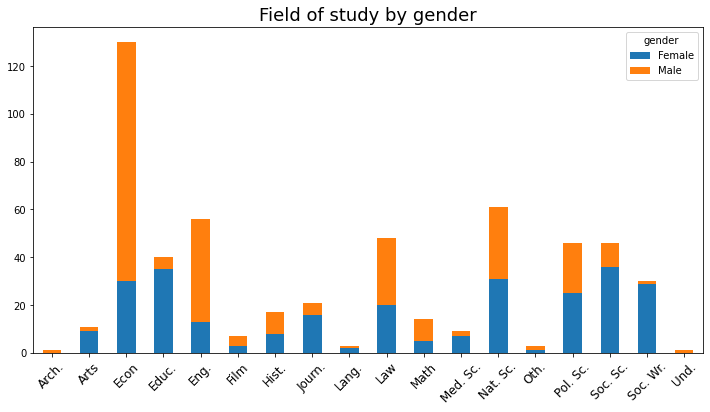

In [205]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
ax = tmp.plot(kind='bar', figsize=(12,6), stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Field of study by gender', fontsize=18)
ax.set_xlabel('',fontsize=1)

In [206]:
tmp = df[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack().fillna(0)
tmp['% Female'] = round(tmp.Female / (tmp.Female + tmp.Male) * 100, 2)
tmp['% Male'] = round(tmp.Male / (tmp.Female + tmp.Male) * 100, 2)
tmp

gender,Female,Male,% Female,% Male
field_cd,,,,
Arch.,0.0,1.0,0.00,100.00
Arts,9.0,2.0,81.82,18.18
Econ,30.0,100.0,23.08,76.92
Educ.,35.0,5.0,87.50,12.50
Eng.,13.0,43.0,23.21,76.79
Film,3.0,4.0,42.86,57.14
Hist.,8.0,9.0,47.06,52.94
Journ.,16.0,5.0,76.19,23.81
Lang.,2.0,1.0,66.67,33.33


Alors que l'ingénierie, la finance et les mathématiques sont principalement dominées par les hommes, les sciences sociales et médicales, les arts et le journalisme sont davantage dominés par les femmes. Les sciences naturelles, les sciences politiques et le cinéma sont représentés à parts égales par les deux sexe

## Religion , on s'en fou ?

Ici, nous nous concentrerons sur ce que les participants déclarent être le niveau d'importance de la race et de la religion pour eux. Ainsi, gardons à l'esprit que c'est ce que les participants déclarent



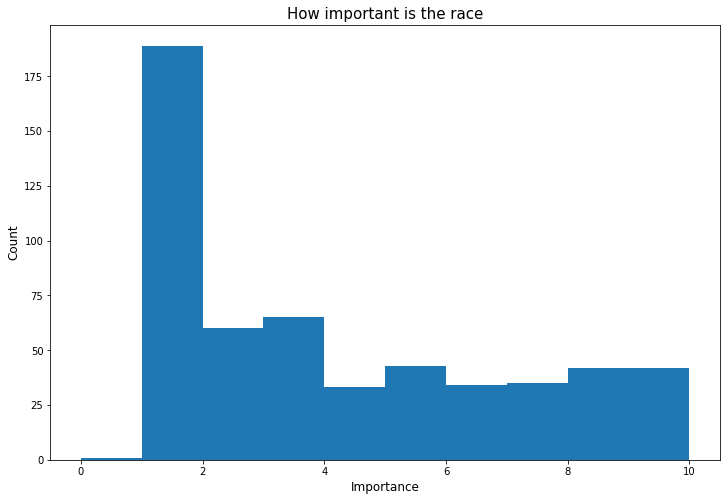

In [207]:
ax = df.imprace.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

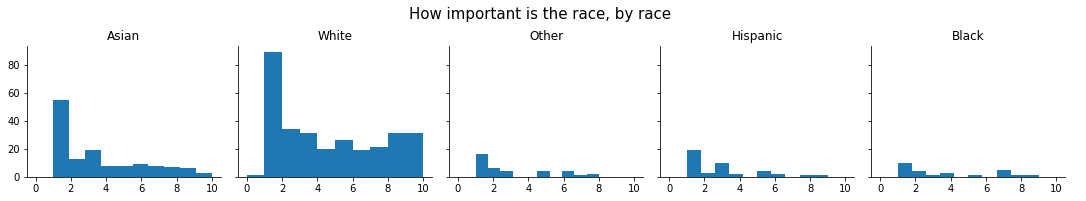

In [208]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

In [209]:
df[['race', 'imprace']].groupby(['race']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
              mean median  min   max count
race                                      
Asian     3.382353    2.5  1.0  10.0   136
Black     3.461538    2.0  1.0   9.0    26
Hispanic  2.666667    2.0  1.0   9.0    42
Other     2.891892    2.0  1.0   8.0    37
White     4.165017    3.0  0.0  10.0   303

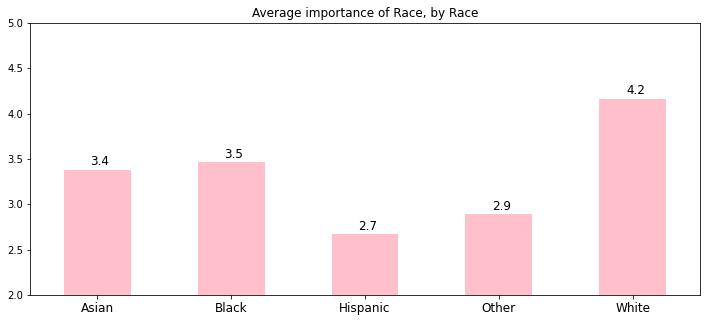

In [210]:
ax = df[['race', 'imprace']].groupby('race').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Average importance of Race, by Race',
                                                   ylim=(2,5), color='pink')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

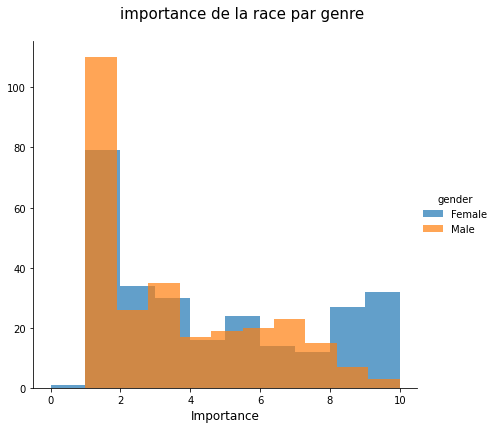

In [211]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.set_xlabels('Importance', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('importance de la race par genre', fontsize=15)
g.add_legend()

In [212]:
df[['gender', 'imprace']].groupby(['gender']).agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
            mean median  min   max count
gender                                  
Female  4.115242    3.0  0.0  10.0   269
Male    3.360000    3.0  1.0  10.0   275

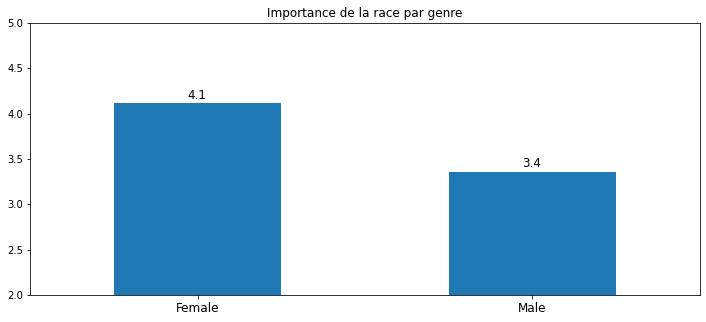

In [213]:
ax = df[['gender', 'imprace']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance de la race par genre',
                                                   ylim=(2,5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

Females declare to care about race more than males. However, something interesting happens if we put race into the mix again.

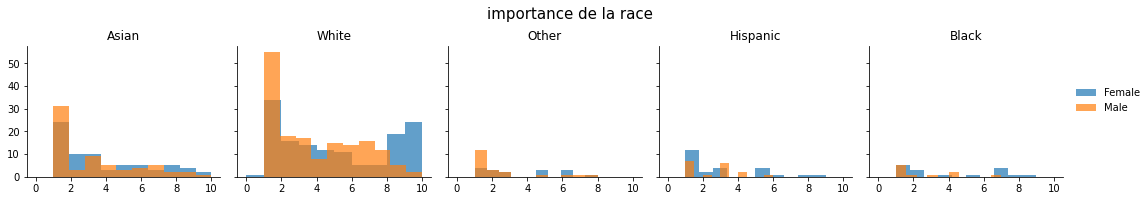

In [214]:
g = sns.FacetGrid(df, col='race', hue='gender')
g.map(plt.hist, 'imprace', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('importance de la race', fontsize=15)

g._legend.set_title('')

In [215]:
df[['gender', 'race', 'imprace']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max', 'count'])

imprace                        
                     mean median  min   max count
gender race                                      
Female Asian     3.633803    3.0  1.0  10.0    71
       Black     4.062500    3.0  1.0   9.0    16
       Hispanic  2.840000    2.0  1.0   9.0    25
       Other     3.562500    3.0  1.0   8.0    16
       White     4.652482    4.0  0.0  10.0   141
Male   Asian     3.107692    2.0  1.0  10.0    65
       Black     2.500000    1.5  1.0   7.0    10
       Hispanic  2.411765    3.0  1.0   6.0    17
       Other     2.380952    1.0  1.0   8.0    21
       White     3.740741    3.0  1.0  10.0   162

On se concentre sur la religion

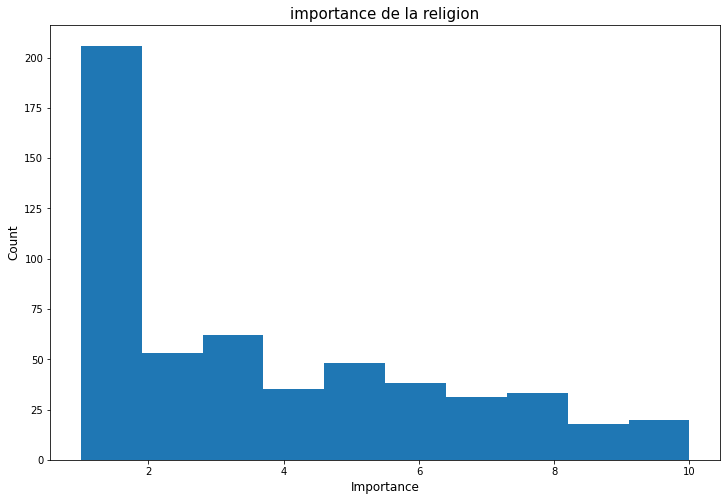

In [216]:
ax = df.imprelig.hist(bins=10, figsize=(12,8))
ax.set_title('importance de la religion', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

Text(0.5, 0.98, 'Importance de la religion par race')

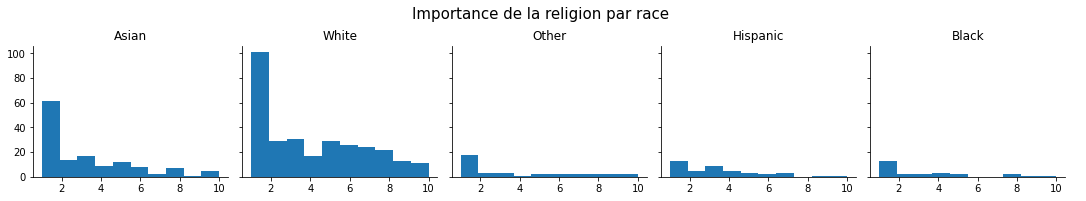

In [217]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprelig', bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Importance de la religion par race', fontsize=15)

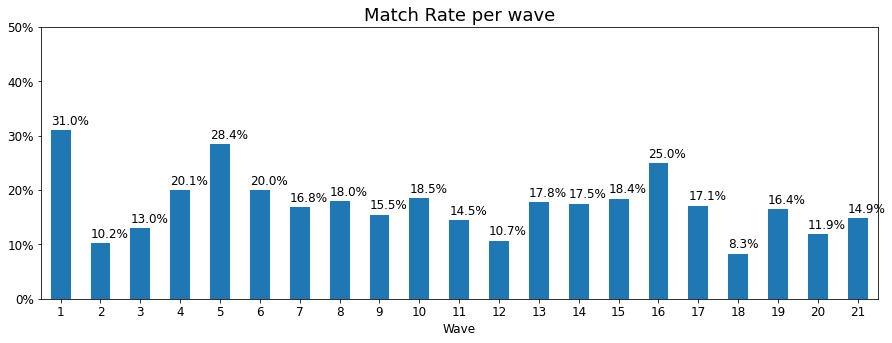

In [218]:
ax = df_data[['wave', 'match']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.5))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Match Rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

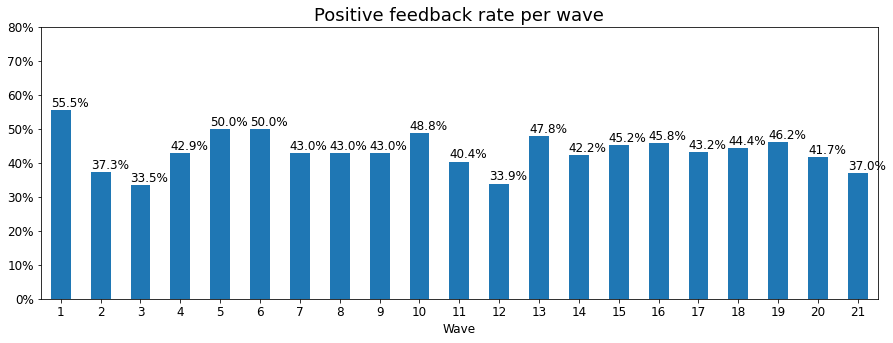

In [219]:
ax = df_data[['wave', 'dec']].groupby('wave').mean().plot(kind='bar', legend=False, figsize=(15,5),
                                                        ylim=(0,0.8))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('Wave', fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)

ax.set_title('Positive feedback rate per wave', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.01, \
            str(round((i.get_height())*100, 1))+'%', fontsize=12)

In [220]:
you_look = [col for col in df_data.columns if '1_1' in col] # what you look for in the opposite sex
other_look =  [col for col in df_data.columns if '4_1' in col] # you think other like you look for in the opposite sex
opp_look = [col for col in df_data.columns if '2_1' in col] # you think the opposite sex look for in you
you_score = [col for col in df_data.columns if '3_1' in col] # how do you score yourself
they_score = [col for col in df_data.columns if '5_1' in col] # the others score you

In [221]:
tmp = df_data[['iid'] + you_look + other_look + opp_look + you_score + they_score].drop_duplicates()
df = pd.merge(df, tmp, on='iid')
df.head()

,iid,wave,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,1,1,Female,21.0,Law,Law,NaN,NaN,NaN,Asian,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,Female,24.0,law,Law,NaN,NaN,NaN,White,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,Female,25.0,Economics,Math,NaN,NaN,NaN,White,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,Female,23.0,Law,Law,NaN,NaN,NaN,White,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,Female,21.0,Law,Law,NaN,NaN,NaN,White,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN


In [222]:
tmp_norm = df[(df.wave < 6) | (df.wave > 9)].copy()
tmp_diff = df[(df.wave > 5) & (df.wave < 10)].copy()
tmp_diff[['wave']+you_look+other_look].head(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
130,6,16.67,16.67,16.67,16.67,16.67,16.67,10.0,7.0,7.0,7.0,5.0,7.0
131,6,12.77,19.15,17.02,17.02,14.89,19.15,7.0,7.0,7.0,7.0,6.0,7.0
132,6,6.67,20.00,20.00,17.78,20.00,15.56,6.0,9.0,9.0,7.0,7.0,6.0
133,6,18.18,22.73,18.18,13.64,13.64,13.64,8.0,8.0,8.0,9.0,9.0,7.0
134,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,6,17.39,17.39,15.22,17.39,13.04,19.57,9.0,6.0,5.0,8.0,5.0,8.0
136,6,20.00,20.00,20.00,20.00,6.67,13.33,9.0,9.0,7.0,8.0,3.0,7.0
137,6,18.75,16.67,18.75,20.83,12.50,12.50,10.0,9.0,8.0,9.0,3.0,8.0
138,6,18.60,16.28,18.60,18.60,11.63,16.28,7.0,9.0,8.0,7.0,7.0,9.0
139,6,20.83,20.83,16.67,16.67,6.25,18.75,10.0,9.0,4.0,7.0,8.0,8.0


In [223]:
tmp_norm[['wave']+you_look+other_look].sample(10)

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
474,19,20.0,20.0,20.0,15.0,15.0,10.0,30.0,10.0,10.0,20.0,10.0,20.0
293,12,10.0,18.0,20.0,16.0,16.0,20.0,24.0,16.0,14.0,18.0,20.0,8.0
27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,5,40.0,20.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
63,3,10.0,25.0,25.0,10.0,10.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
339,14,20.0,20.0,20.0,20.0,20.0,0.0,20.0,10.0,20.0,20.0,0.0,40.0
289,11,20.0,20.0,15.0,15.0,12.0,18.0,30.0,10.0,10.0,20.0,10.0,20.0
455,18,25.0,0.0,25.0,25.0,0.0,25.0,20.0,20.0,10.0,15.0,20.0,15.0
382,15,20.0,20.0,20.0,20.0,20.0,0.0,25.0,15.0,15.0,10.0,20.0,15.0


Text(0.5, 0.98, 'How do you think you measure up?')

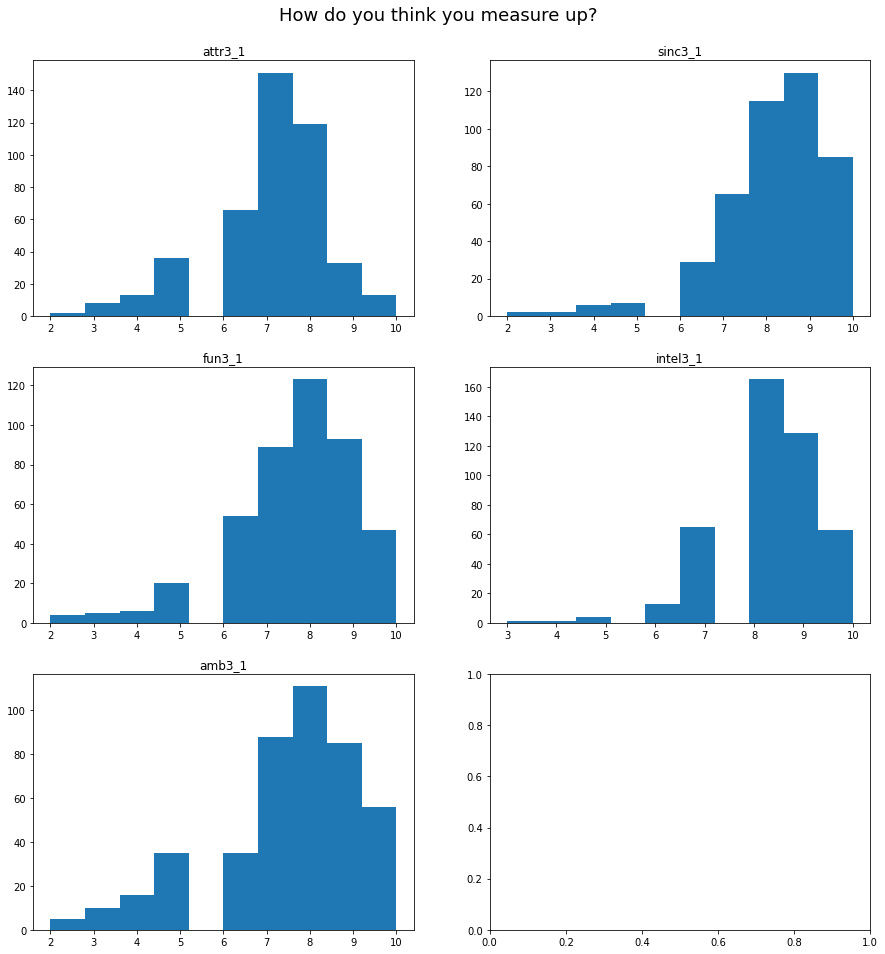

In [224]:


num = len(you_score)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in you_score:
    tmp_norm[feat].hist(label=feat, ax=ax[i][j], bins=10)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you think you measure up?', fontsize=18)

In [225]:
df = df_data[['iid', 'race', 'gender', 'field_cd', 'dec', 'match', 'int_corr', 'samerace', 'met',
             'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].copy()
df.head(5)

,iid,race,gender,field_cd,dec,match,int_corr,samerace,met,attr,sinc,intel,fun,amb,shar,like,prob
0,1,Asian,Female,Law,1,0,0.14,0,2.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,Asian,Female,Law,1,0,0.54,0,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,Asian,Female,Law,1,1,0.16,1,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,Asian,Female,Law,1,1,0.61,0,2.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,Asian,Female,Law,1,1,0.21,0,2.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0


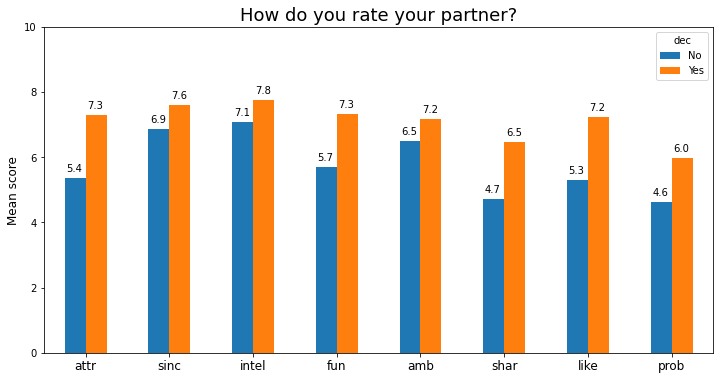

In [226]:
tmp = df_data[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].groupby('dec').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,10))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')

ax.set_title('How do you rate your partner?', fontsize=18)
ax.set_ylabel('Mean score', fontsize=12)

for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+0.2, \
            str(round((i.get_height()), 1)), fontsize=10)

Text(0.5, 0.98, 'How do you rate your partner?')

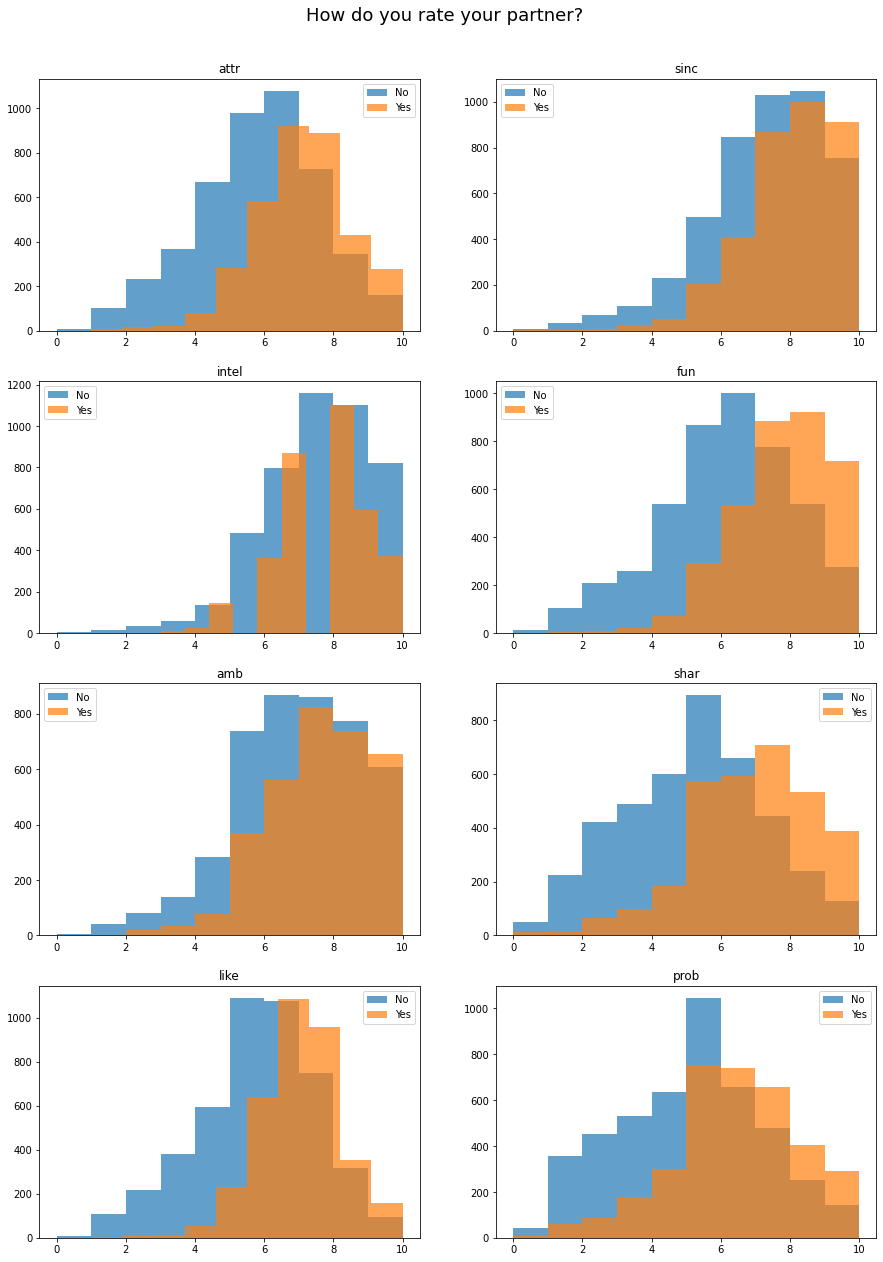

In [227]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.dec==0][feat].hist(label='No', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.dec==1][feat].hist(label='Yes', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j
    
plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18)

##conclusion
J'ai constaté une relation entre le sexe, la race et l'importance de la race et de la religion, le sexe ayant un poids beaucoup plus important.
et aussi ,les participants ont généralement déclaré ne pas accorder beaucoup d'importance à la race, mais qu'ils étaient aussi généralement plus enclins à donner un avis positif sur leur rendez-vous si le partenaire était de la même race qu'eux.
La mesure dans laquelle les participants trouvent leur partenaire attirant (ou d'autres attributs clés) est bien plus importante que les intérêts communs, la race et le domaine d'études.
Les personnes de races différentes aiment presque les mêmes choses, à quelques exceptions près (voir la sous-section sur les intérêts)